In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('adult.csv')

In [138]:
print(df.head(10))

   age         workclass  fnlwgt     education  educational-num  \
0   25           Private  226802          11th                7   
1   38           Private   89814       HS-grad                9   
2   28         Local-gov  336951    Assoc-acdm               12   
3   44           Private  160323  Some-college               10   
4   18                 ?  103497  Some-college               10   
5   34           Private  198693          10th                6   
6   29                 ?  227026       HS-grad                9   
7   63  Self-emp-not-inc  104626   Prof-school               15   
8   24           Private  369667  Some-college               10   
9   55           Private  104996       7th-8th                4   

       marital-status         occupation   relationship   race  gender  \
0       Never-married  Machine-op-inspct      Own-child  Black    Male   
1  Married-civ-spouse    Farming-fishing        Husband  White    Male   
2  Married-civ-spouse    Protective-serv

In [139]:
# Some columns has the value '?' which I will replace with 'other'
df[df=='?'].count()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [140]:
df['workclass'] = df['workclass'].replace('?', 'other')
df['occupation'] = df['occupation'].replace('?', 'other')
df['native-country'] = df['native-country'].replace('?', 'other')
df[df=='?'].count()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [141]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'educational-num'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

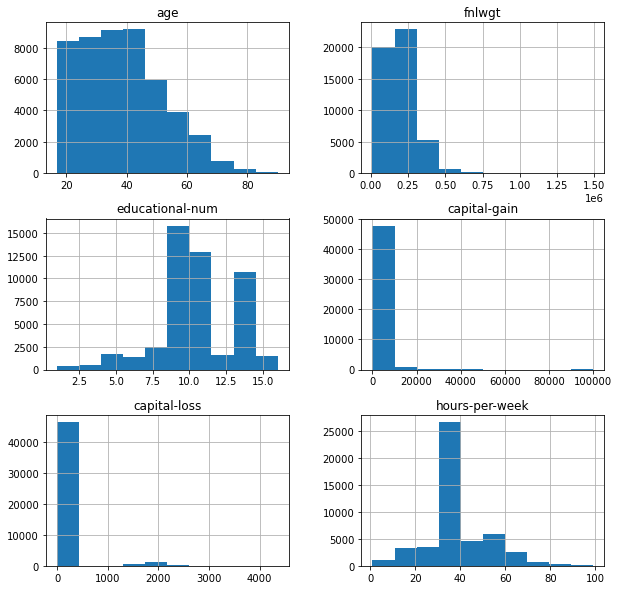

In [6]:
df.hist(figsize=(10,10), bins=10)

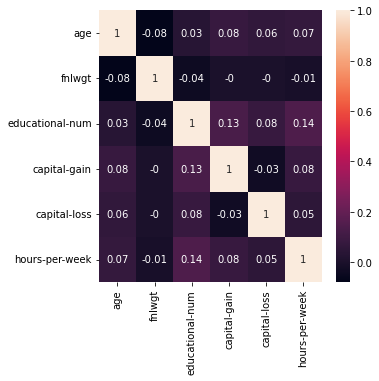

In [136]:
plt.figure(figsize=(5,5))
corr = df.corr()
corr = round(corr, 2)
#print(corr)
heat_map = sns.heatmap(corr, annot=True)

plt.show()

# There seems to be correlations between the following columns.
   # educational-num and capital-gain
   # educational-num and hours-per-week
   # age and capital-gain - a little correlation

In [42]:
edu_hours = df.groupby('educational-num')['hours-per-week'].mean()
edu_hours = pd.DataFrame(edu_hours)
edu_hours = edu_hours.reset_index()
edu_hours


,educational-num,hours-per-week
0,1,36.566265
1,2,38.761134
2,3,38.923379
3,4,39.003141
4,5,38.359788
5,6,36.986321
6,7,33.952539
7,8,35.374429
8,9,40.640775
9,10,38.865784


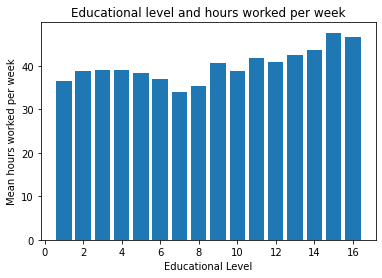

In [44]:
fig, ax = plt.subplots()
ax.bar(edu_hours['educational-num'], edu_hours['hours-per-week'])
plt.xlabel('Educational Level')
plt.ylabel('Mean hours worked per week')
plt.title('Educational level and hours worked per week')
plt.show()

# With the exception of people in the 7-8 educational level category, the overall trend was that more educated people
# tend to work more hours. It would be interesting to compare this to recent data.

In [59]:
df_cap_gain = df[df['capital-gain'] != 0]
df_cap_gain.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
14,48,Private,279724,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3103,0,48,United-States,>50K
25,45,Self-emp-not-inc,432824,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,90,United-States,>50K


In [60]:
cap_gain_hours = df_cap_gain.groupby('educational-num')['capital-gain'].mean()
cap_gain_hours = pd.DataFrame(cap_gain_hours)
cap_gain_hours = cap_gain_hours.reset_index()
cap_gain_hours

,educational-num,capital-gain
0,1,15189.000000
1,2,3815.875000
2,3,7975.043478
3,4,3564.738462
4,5,5384.750000
5,6,8466.339623
6,7,4673.113924
7,8,5075.444444
8,9,8794.160350
9,10,8714.251788


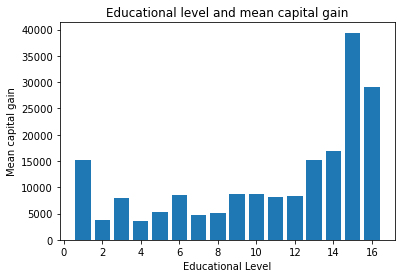

In [61]:
fig, ax = plt.subplots()
ax.bar(cap_gain_hours['educational-num'], cap_gain_hours['capital-gain'])
plt.xlabel('Educational Level')
plt.ylabel('Mean capital gain')
plt.title('Educational level and mean capital gain')
plt.show()

# With the exception of educational level 1, there seems to be a correlation between capital gain and educational level. 
# Capital gain is at the maximum at the educational level of 15 and dips a bit at 16. 

In [62]:
df_cap_loss = df[df['capital-loss'] != 0]
df_cap_loss.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
52,21,Private,214399,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,1721,24,United-States,<=50K
82,24,Private,83141,Some-college,10,Separated,Other-service,Not-in-family,White,Male,0,1876,40,United-States,<=50K
129,41,Private,239296,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2415,50,United-States,>50K
143,43,Self-emp-inc,214503,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1887,45,United-States,>50K
154,40,State-gov,67874,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,1887,45,United-States,>50K


In [63]:
cap_loss_hours = df_cap_loss.groupby('educational-num')['capital-loss'].mean()
cap_loss_hours = pd.DataFrame(cap_loss_hours)
cap_loss_hours = cap_loss_hours.reset_index()
cap_loss_hours

,educational-num,capital-loss
0,1,1695.500000
1,2,1980.000000
2,3,2065.500000
3,4,1899.566667
4,5,1697.000000
5,6,1861.365854
6,7,1780.471698
7,8,1723.272727
8,9,1845.529711
9,10,1822.613636


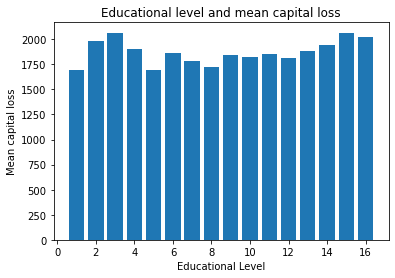

In [64]:
fig, ax = plt.subplots()
ax.bar(cap_loss_hours['educational-num'], cap_loss_hours['capital-loss'])
plt.xlabel('Educational Level')
plt.ylabel('Mean capital loss')
plt.title('Educational level and mean capital loss')
plt.show()

# There doesn't seem to be much correlation between educational level and capital loss. 

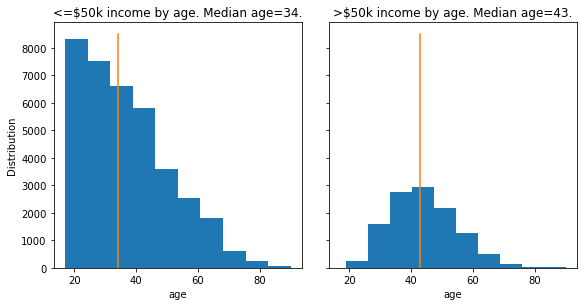

In [159]:
income0 = df[df['income']=='<=50K']
income1 = df[df['income']=='>50K']
income0_byage = income0['age'].values
income1_byage = income1['age'].values

fig2, ax2 = plt.subplots(figsize=(8,4), nrows=1, ncols=2, sharey=True, sharex=True)
plt.tight_layout()
ax2[0].hist(income0_byage)
ax2[1].hist(income1_byage)

ax2[0].set_xlabel('age')
ax2[0].set_ylabel('Distribution')
ax2[0].set_title('<=$50k income by age. Median age=34.')

ax2[1].set_xlabel('age')
#ax2[1].set_ylabel('Distribution')
ax2[1].set_title('>$50k income by age. Median age=43.')

#ax2[0].set_ylim([0,9000])
#ax2[1].set_ylim([0,9000])

ax2[0].plot([34,34], [34, 8500])
ax2[1].plot([43,43], [43, 8500])

There are a lot less people in the >50,000 income category. There are more than 3 times as many people in the <=50,000 income category when compared to the number of people in the >50,000 income category.

More younger people seem to be in the lower than 50,000 income category. However, this may also be because there are more younger people in the population. ??

Of those who earn more than 50K, the majority are in the age range of 35-45.


In [145]:
print(income0['age'].mean())
print(income0['age'].median())

print(income1['age'].mean())
print(income1['age'].median())

36.87218409366169
34.0
44.275177547702576
43.0


In [74]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

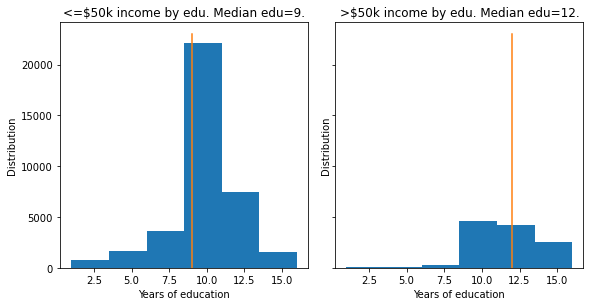

In [169]:
# Income versus educational-num


income0_edunum = income0['educational-num']
income1_edunum = income1['educational-num']

fig2, ax2 = plt.subplots(figsize=(8,4), nrows=1, ncols=2, sharey=True)
plt.tight_layout()
ax2[0].hist(income0_edunum, bins=6)
ax2[1].hist(income1_edunum, bins=6)

ax2[0].set_xlabel('Years of education')
ax2[0].set_ylabel('Distribution')
ax2[0].set_title('<=$50k income by edu. Median edu=9.')

ax2[1].set_xlabel('Years of education')
ax2[1].set_ylabel('Distribution')
ax2[1].set_title('>$50k income by edu. Median edu=12.')

# labeling the median values
ax2[0].plot([9,9], [9,23000])
ax2[1].plot([12,12], [12,23000])


In [162]:
print('mean years of education for people who earn =<50K', income0_edunum.mean())
print('mean years of education for people who earn >50K', income1_edunum.mean())

print('median years of education for people who earn =<50K', income0_edunum.median())
print('median years of education for people who earn >50K', income1_edunum.median())

mean years of education for people who earn =<50K 9.598492800430629
mean years of education for people who earn >50K 11.602806537178061
median years of education for people who earn =<50K 9.0
median years of education for people who earn >50K 12.0


In [76]:
df.gender.value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

In [77]:
male = df[df['gender']=='Male']
female = df[df['gender']=='Female']

In [94]:
print('Males by income')
print(male['income'].value_counts(normalize=True))
print('Females by income')
print(female['income'].value_counts(normalize=True))

male_income = male['income'].value_counts(normalize=True)
male_income = pd.DataFrame(male_income).reset_index()
male_income.columns = ['income', '%']


female_income = female['income'].value_counts(normalize=True)
female_income = pd.DataFrame(female_income).reset_index()
female_income.columns = ['income', '%']


# Only 11% of females are in the >50K income category. 30% of males are in the >50K income category.

Males by income
<=50K    0.696233
>50K     0.303767
Name: income, dtype: float64
Females by income
<=50K    0.890749
>50K     0.109251
Name: income, dtype: float64


,income,%
0,<=50K,0.890749
1,>50K,0.109251


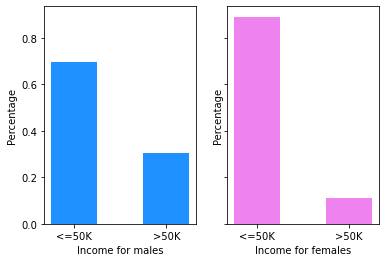

In [172]:
fig, ax = plt.subplots(1, 2, sharey=True)
ax[0].bar(male_income['income'], male_income['%'], width=0.5, color='dodgerblue')
ax[0].set_xlabel('Income for males')
ax[0].set_ylabel('Percentage')
ax[1].bar(female_income['income'], female_income['%'], width=0.5, color='violet')
ax[1].set_xlabel('Income for females')
ax[1].set_ylabel('Percentage')
plt.show()

In [ ]:
fig, ax = plt.subplots()
as.boxplot()

In [86]:
print('Median educational level by gender: ', df.groupby('gender')['educational-num'].median())
print('Mean educational level by gender: ', df.groupby('gender')['educational-num'].mean())

# The educational number for males and females is similar although their income level vary widely.

Median educational level by gender:  gender
Female    10.0
Male      10.0
Name: educational-num, dtype: float64
Mean educational level by gender:  gender
Female    10.044034
Male      10.094977
Name: educational-num, dtype: float64
